In [ ]:
	
import matplotlib.pyplot as plt
import numpy as np

def show_montage(X, n, m, h, w):

    '''
    X: image matrix in which each column represents an image
    n, m: image size n x m
    h, w : create an h x w montage image with figsize = (w,h)
    '''
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影像張數不到 w x h 張，用 0 向量補齊     
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
        
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(X)[:,i].reshape(m, n), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

In [1]:
import numpy as np
def randsphere(center, radius, n_per_sphere):
    '''
    generate random numbers in a n-dimensional sphere 
    i.e. in 2D, it is in a circle; in 3D, it is in a ball
    '''  
    r=radius
    ndim=center.size
    np.random.seed(123)
    x=np.random.normal(size=(n_per_sphere,ndim))#標準常態分佈
    ssq=np.sum(x**2,axis=1)
    fr=r*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled=np.tile(fr.reshape(n_per_sphere,1),(1,ndim))
    p=center+np.multiply(x,frtiled)
    return p

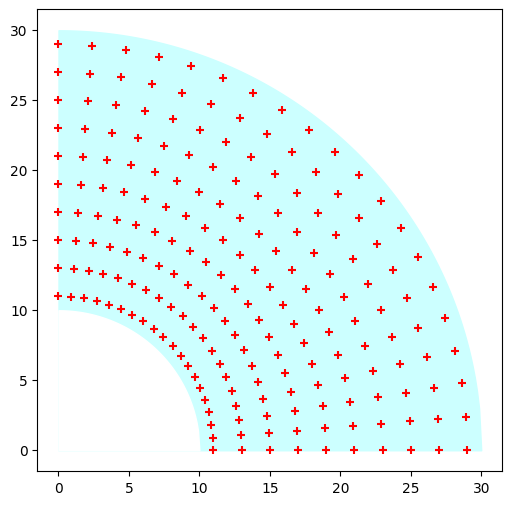

In [2]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Preaper training data (input)
l1, l2 = 20, 10
f1=lambda x:np.sqrt((l1+l2)**2-x**2)
f2=lambda x:np.sqrt(l2**2-x**2)

plt.figure(figsize=(6,6))
x=np.linspace(0,l1+l2,200)
plt.fill_between(x,f1(x),0,color="#CCFFFF")
x=np.linspace(0,l2,100)
plt.fill_between(x,f2(x),0,color="white")

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))
plt.scatter(X.ravel(),Y.ravel(),marker='+',color='r')
plt.savefig('statcomp_hw6_plot1.png')

Root Mean square error is 0.0455


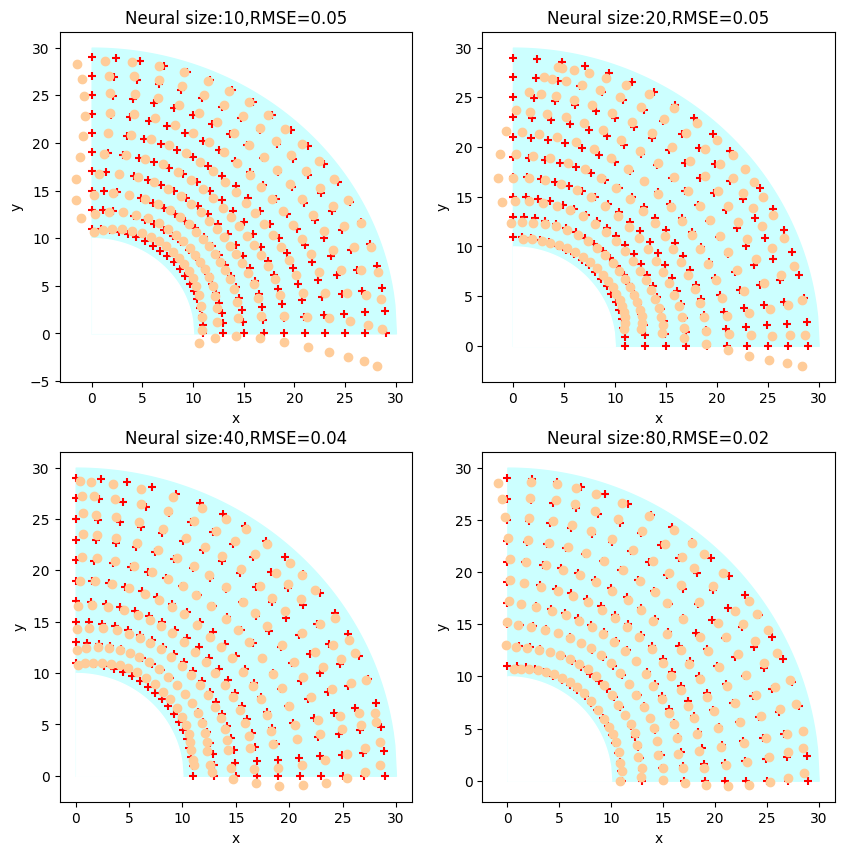

In [3]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# Preaper training data (input)
l1, l2 = 20, 10
f1=lambda x:np.sqrt((l1+l2)**2-x**2)
f2=lambda x:np.sqrt(l2**2-x**2)
fig,ax=plt.subplots(2,2,figsize=(10,10))

x=np.linspace(0,l1+l2,200)
ax[0][0].fill_between(x,f1(x),0,color="#CCFFFF"),ax[0][1].fill_between(x,f1(x),0,color="#CCFFFF"),ax[1][0].fill_between(x,f1(x),0,color="#CCFFFF"),ax[1][1].fill_between(x,f1(x),0,color="#CCFFFF")
x=np.linspace(0,l2,100)
ax[0][0].fill_between(x,f2(x),0,color="white"),ax[0][1].fill_between(x,f2(x),0,color="white"),ax[1][0].fill_between(x,f2(x),0,color="white"),ax[1][1].fill_between(x,f2(x),0,color="white")

t = np.linspace(0, np.pi/2, 20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))

ax[0][0].scatter(X.ravel(),Y.ravel(),marker='+',color='r'),ax[0][1].scatter(X.ravel(),Y.ravel(),marker='+',color='r'),ax[1][0].scatter(X.ravel(),Y.ravel(),marker='+',color='r'),ax[1][1].scatter(X.ravel(),Y.ravel(),marker='+',color='r')
# prepare training data (output)
theta2 = np.arccos((X.ravel()**2 + Y.ravel()**2 -\
        l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(Y.ravel()/X.ravel()) - \
        np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
# setup for ANN training
InputX = np.c_[X.ravel(), Y.ravel()] 
OutputY = np.c_[theta1, theta2] 
#-------------學習器的設定------------------------
hidden_layers1 = (10, ) #第一層10個
hidden_layers2 = (20, )
hidden_layers3 = (40, )
hidden_layers4 = (80, )
solver = 'lbfgs' # the best for robot data 
# solver = ’sgd’
# solver = ’adam’
mlp_reg1 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers1, verbose = False, activation = 'logistic', # default activation = ’relu’ 
tol=1e-6, random_state = 0)#遞迴到80000次就停止,solver代表演算法,verbose代表是否要列印出演算法的過程
mlp_reg2 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers2, verbose = False, activation = 'logistic',tol=1e-6, random_state = 0)
mlp_reg3 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers3, verbose = False, activation = 'logistic',tol=1e-6, random_state = 0)
mlp_reg4 = MLPRegressor(max_iter = 80000, solver = solver, hidden_layer_sizes = hidden_layers4, verbose = False, activation = 'logistic',tol=1e-6, random_state = 0)
#-----------------------------------------------
mlp_reg1.fit(InputX, OutputY) ,mlp_reg2.fit(InputX, OutputY),mlp_reg3.fit(InputX, OutputY) ,mlp_reg4.fit(InputX, OutputY)  
OutputY_hat1 = mlp_reg1.predict(InputX)
OutputY_hat2 = mlp_reg2.predict(InputX)
OutputY_hat3 = mlp_reg3.predict(InputX)
OutputY_hat4 = mlp_reg4.predict(InputX)
theta1_hat1, theta2_hat1 = OutputY_hat1[:,0], OutputY_hat1[:,1]
theta1_hat2, theta2_hat2 = OutputY_hat2[:,0], OutputY_hat2[:,1]
theta1_hat3, theta2_hat3 = OutputY_hat3[:,0], OutputY_hat3[:,1]
theta1_hat4, theta2_hat4 = OutputY_hat4[:,0], OutputY_hat4[:,1]
# convert to (x,y) positions
x_hat1 = l1 * np.cos(theta1_hat1) + l2 * np.cos(theta1_hat1+theta2_hat1)
y_hat1 = l1 * np.sin(theta1_hat1) + l2 * np.sin(theta1_hat1+theta2_hat1)
x_hat2 = l1 * np.cos(theta1_hat2) + l2 * np.cos(theta1_hat2+theta2_hat2)
y_hat2 = l1 * np.sin(theta1_hat2) + l2 * np.sin(theta1_hat2+theta2_hat2)
x_hat3 = l1 * np.cos(theta1_hat3) + l2 * np.cos(theta1_hat3+theta2_hat3)
y_hat3 = l1 * np.sin(theta1_hat3) + l2 * np.sin(theta1_hat3+theta2_hat3)
x_hat4 = l1 * np.cos(theta1_hat4) + l2 * np.cos(theta1_hat4+theta2_hat4)
y_hat4 = l1 * np.sin(theta1_hat4) + l2 * np.sin(theta1_hat4+theta2_hat4)
#print(mlp_reg.get_params)
# R_square=mlp_reg1.score(InputX,OutputY)
# print('R square={:.4f}'.format(R_square))
# mse=np.mean((OutputY-OutputY_hat)**2)
rmse1 = np.sqrt(mean_squared_error(OutputY, OutputY_hat1))
rmse2 = np.sqrt(mean_squared_error(OutputY, OutputY_hat2))
rmse3 = np.sqrt(mean_squared_error(OutputY, OutputY_hat3))
rmse4 = np.sqrt(mean_squared_error(OutputY, OutputY_hat4))
print('Root Mean square error is {:.4f}'.format(rmse1))   
# LossFun=mlp_reg1.loss_
# print('The Loss function is {:.4f}'.format(LossFun))
# print("Number of iterations :{}".format(mlp_reg1.n_iter_))
#show the predicted data with the training data
ax[0][0].scatter(x_hat1,y_hat1,marker='o',color='#FFCC99'),ax[0][1].scatter(x_hat2,y_hat2,marker='o',color='#FFCC99'),ax[1][0].scatter(x_hat3,y_hat3,marker='o',color='#FFCC99'),ax[1][1].scatter(x_hat4,y_hat4,marker='o',color='#FFCC99')
ax[0][0].set_xlabel('x')
ax[0][0].set_ylabel('y')
ax[0][1].set_xlabel('x')
ax[0][1].set_ylabel('y')
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('y')
ax[0,0].set_title('Neural size:10,RMSE={:.2f}'.format(rmse1))
ax[0,1].set_title('Neural size:20,RMSE={:.2f}'.format(rmse2))
ax[1,0].set_title('Neural size:40,RMSE={:.2f}'.format(rmse3))
ax[1,1].set_title('Neural size:80,RMSE={:.2f}'.format(rmse4))
plt.savefig('statcomp_hw6_plot2.png')

### 圓形內均勻樣本

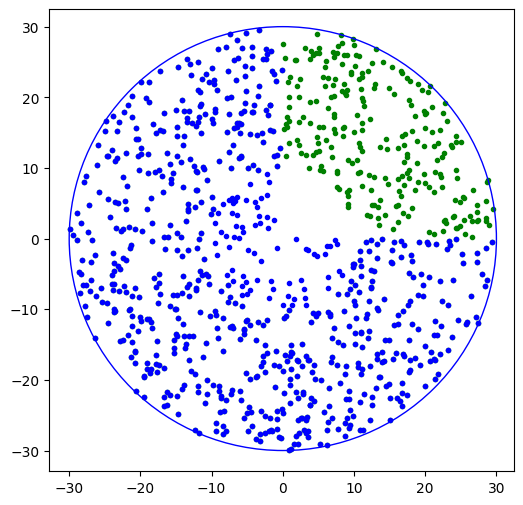

In [4]:
import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt

def randsphere(center, radius, n_per_sphere):
    '''
    generate random numbers in a n-dimensional sphere 
    i.e. in 2D, it is in a circle; in 3D, it is in a ball
    '''  
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))  # 標準常態分佈
    ssq = np.sum(x**2, axis=1)
    fr = r * gammainc(ndim/2, ssq/2)**(1/ndim) / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p

radius_in, radius_out = 10, 30
p = randsphere(np.array([0, 0]), 30, 1000)

# Filter points in the first quadrant and set their color to green
mask_first_quadrant = (p[:, 0] > 0) & (p[:, 1] > 0)
d = np.sum(p**2, axis = 1)
p_first_quadrant = p[d>=radius_in**2, :]

fig = plt.figure(figsize=(6, 6))
ax = fig.gca()

# Plot points in the first quadrant in green
ax.scatter(p_first_quadrant[:, 0], p_first_quadrant[:, 1], marker='.', color='green', label='First Quadrant')

# Plot points outside the first quadrant in blue
ax.scatter(p[~mask_first_quadrant, 0], p[~mask_first_quadrant, 1], marker='.', color='blue', label='Training Data')

# Add the outer circle
ax.add_artist(plt.Circle(np.array([0, 0]), radius_out, fill=False, color='blue'))
plt.savefig('statcomp_hw6_plot3.png')

### 不同樣本數類神經模型

Trainer(TrainBFGS)
Epoch: 100; Error: 0.02447865738639459;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.0295634509971432;
Epoch: 200; Error: 0.010412670562857003;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.06205483351982964;
Epoch: 200; Error: 0.01482541949046203;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.1602053416570512;
Epoch: 200; Error: 0.05201428265022691;
Epoch: 300; Error: 0.04106816406913045;
Epoch: 400; Error: 0.039281707240738706;
Epoch: 500; Error: 0.036853667460421444;
Epoch: 600; Error: 0.03573627688864722;
Epoch: 700; Error: 0.03114115966696475;
Epoch: 800; Error: 0.028843569593768572;
Epoch: 900; Error: 0.027314645038413576;
Epoch: 1000; Error: 0.02465811889619383;
Epoch: 1100; Error: 0.023718737446112477;
Epoch: 1200; Error: 0.022799420813137825;
Epoch: 1300; Error: 0.02159822949756867;
Epoch: 1400; Error: 0.021218264399911684;
Epoch: 1500; Error: 0.02102746966323172;
Epoch: 1600; Err

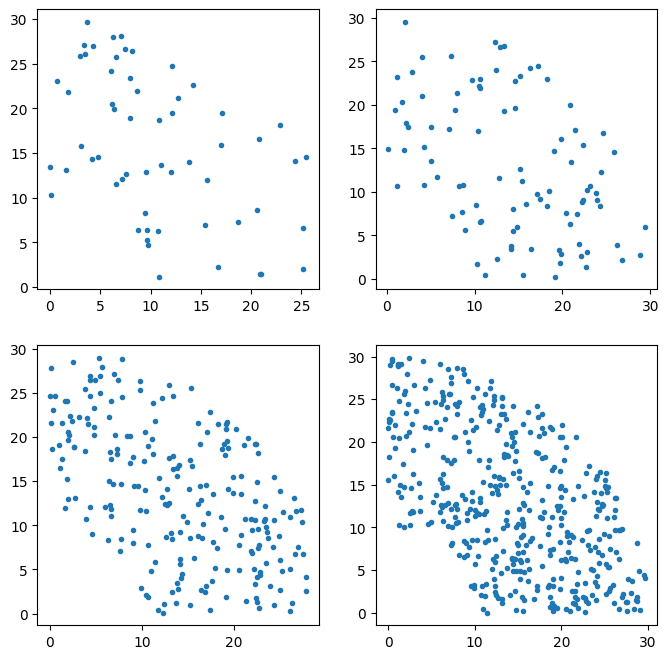

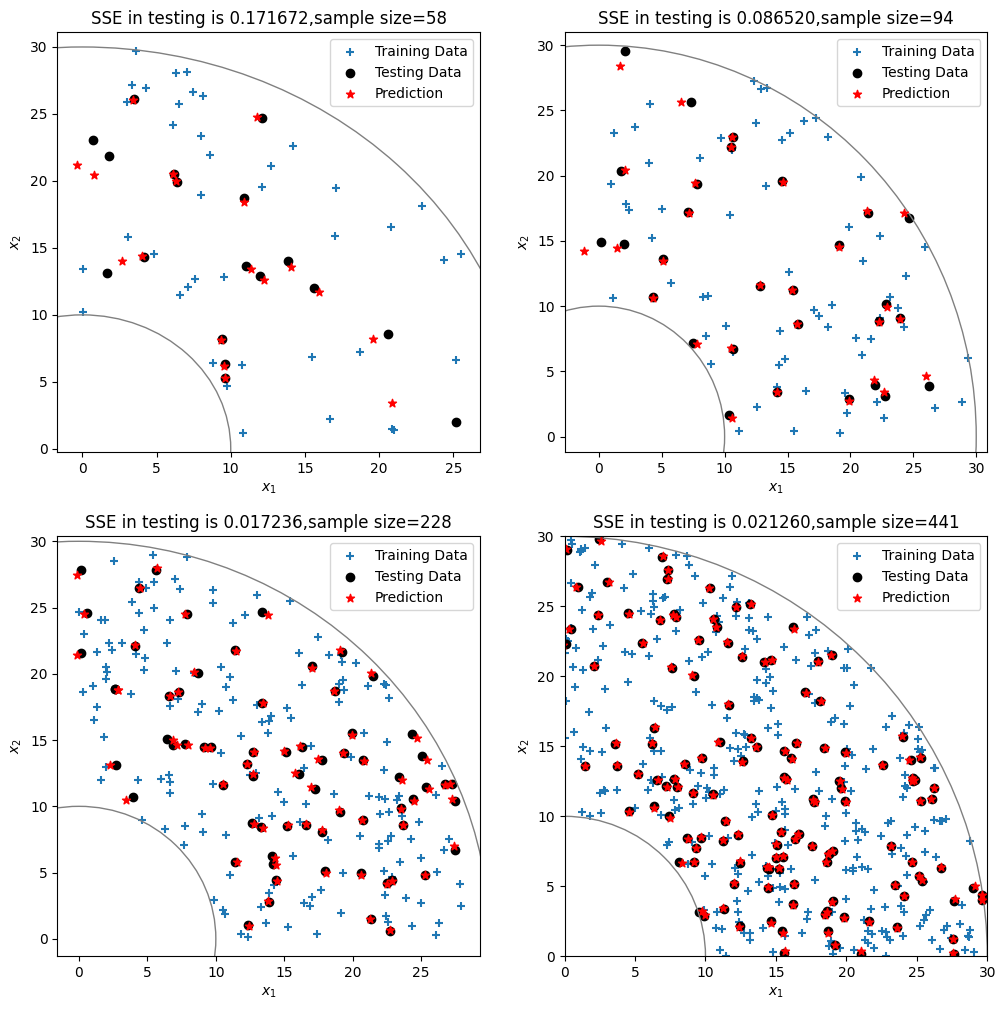

In [5]:
import neurolab as nl
from sklearn.model_selection import train_test_split

import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt
radius_in=10
radius_out=30
samplesize=[250,500,1000,2000]
fig,ax=plt.subplots(2,2,figsize=(8,8))
p1=randsphere(np.array([0,0]),30,samplesize[0])
p1=p1[(p1[:,0]>0)&(p1[:,1]>0),:]#第一象限
d=np.sum(p1**2,axis=1)
p1=p1[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[0,0].scatter(p1[:,0],p1[:,1],marker='.')
# ------------------------------------------------
p2=randsphere(np.array([0,0]),30,samplesize[1])
p2=p2[(p2[:,0]>0)&(p2[:,1]>0),:]#第一象限
d=np.sum(p2**2,axis=1)
p2=p2[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[0,1].scatter(p2[:,0],p2[:,1],marker='.')
# ---------------------------------------------------
p3=randsphere(np.array([0,0]),30,samplesize[2])
p3=p3[(p3[:,0]>0)&(p3[:,1]>0),:]#第一象限
d=np.sum(p3**2,axis=1)
p3=p3[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[1,0].scatter(p3[:,0],p3[:,1],marker='.')
# -------------------------------------------------------
p4=randsphere(np.array([0,0]),30,samplesize[3])
p4=p4[(p4[:,0]>0)&(p4[:,1]>0),:]#第一象限
d=np.sum(p4**2,axis=1)
p4=p4[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[1,1].scatter(p4[:,0],p4[:,1],marker='.')
#第一個圓
x1, x2 = p1[:,0], p1[:,1]
center=np.array([0,0])
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,0].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p1[:,0])))
ax[0,0].legend()
ax[0,0].set_xlabel('$x_1$')
ax[0,0].set_ylabel('$x_2$')
# ax[0,0].set_xlim(0, 30)
# ax[0,0].set_ylim(0, 30)
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,1].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p2[:,0])))
ax[0,1].legend()
ax[0,1].set_xlabel('$x_1$')
ax[0,1].set_ylabel('$x_2$')
# ax[0,1].set_xlim(0, 30)
# ax[0,1].set_ylim(0, 30)
#第三個圓
x1, x2 = p3[:,0], p3[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,0].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p3[:,0])))
ax[1,0].legend()
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
# ax[1,0].set_xlim(0, 30)
# ax[1,0].set_ylim(0, 30)
#第四個圓
x1, x2 = p4[:,0], p4[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,1].set_title('SSE in testing is {:.6f},sample size={}'.format(sse_test,np.size(p4[:,0])))
ax[1,1].legend()
ax[1,1].set_xlabel('$x_1$')
ax[1,1].set_ylabel('$x_2$')
ax[1,1].set_xlim(0, 30)
ax[1,1].set_ylim(0, 30)
plt.savefig('statcomp_hw6_plot4.png')

Trainer(TrainBFGS)
Epoch: 100; Error: 0.036464814903707635;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.02289319190434755;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.055733709084059266;
Epoch: 200; Error: 0.015226885009640633;
Epoch: 300; Error: 0.01273295962663004;
Epoch: 400; Error: 0.010455240975713442;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.21494972208046167;
Epoch: 200; Error: 0.06959766977774735;
Epoch: 300; Error: 0.03823122698321839;
Epoch: 400; Error: 0.031329014525424886;
Epoch: 500; Error: 0.029139489989330872;
Epoch: 600; Error: 0.02538595773964127;
Epoch: 700; Error: 0.024141499007266934;
Epoch: 800; Error: 0.022147593079547768;
Epoch: 900; Error: 0.020192369880639355;
Epoch: 1000; Error: 0.019207681276479233;
Epoch: 1100; Error: 0.01849355624323345;
Epoch: 1200; Error: 0.017872667194579115;
Epoch: 1300; Error: 0.017372296976156942;
Epoch: 1400; Error: 0.01669519165103015;
Epoch: 1500

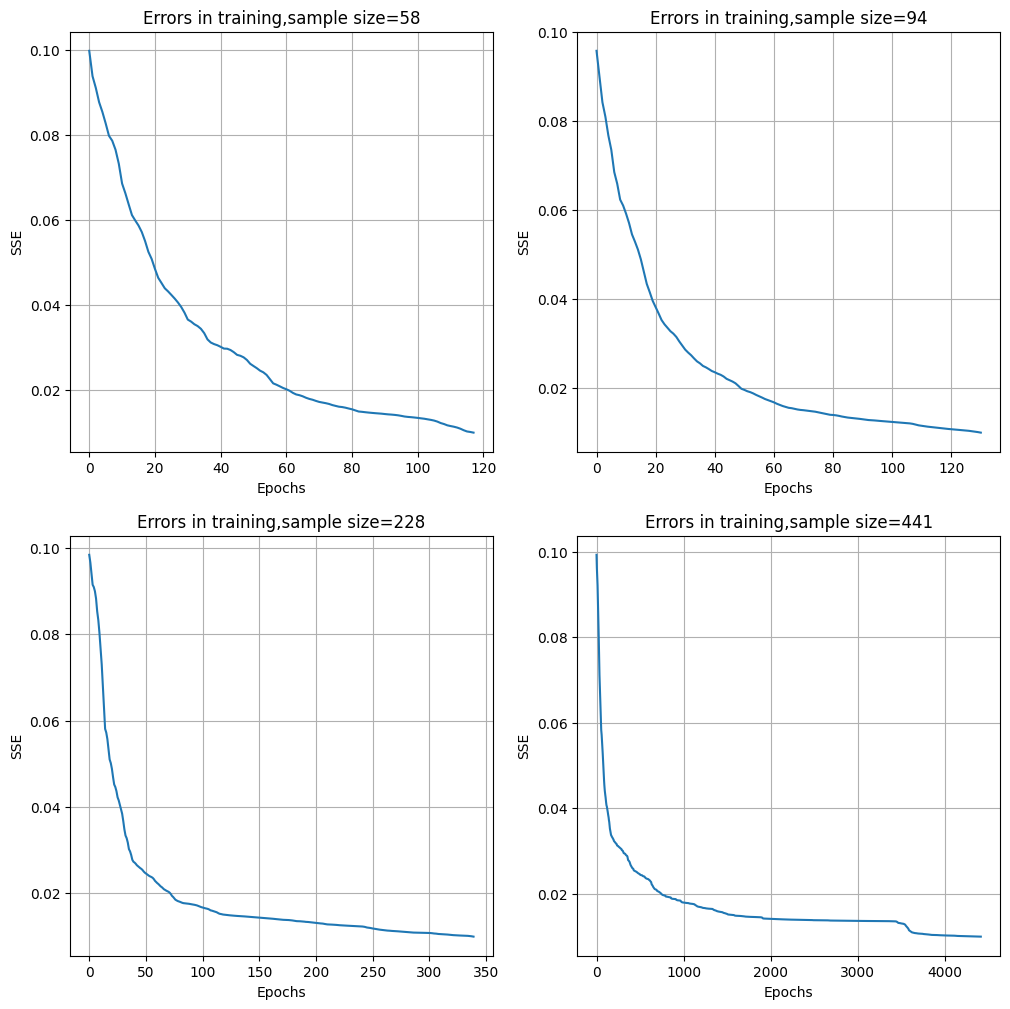

In [6]:
import neurolab as nl
from sklearn.model_selection import train_test_split
#第一個圓
x1, x2 = p1[:,0], p1[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
# ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,0].set_title('SSE in testing is {:.6f},sample size=105'.format(sse_test))
# ax[0,0].legend()
# ax[0,0].set_xlabel('$x_1$')
# ax[0,0].set_ylabel('$x_2$')
# ax[0,0].set_xlim(0, 30)
# ax[0,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,0].plot(err[err < 0.1])
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('SSE')
ax[0,0].grid(True)
ax[0,0].set_title('Errors in training,sample size={}'.format(np.size(p1[:,0])))
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,1].set_title('SSE in testing is {:.6f},sample size=227'.format(sse_test))
# ax[0,1].legend()
# ax[0,1].set_xlabel('$x_1$')
# ax[0,1].set_ylabel('$x_2$')
# ax[0,1].set_xlim(0, 30)
# ax[0,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,1].plot(err[err < 0.1])
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('SSE')
ax[0,1].grid(True)
ax[0,1].set_title('Errors in training,sample size={}'.format(np.size(p2[:,0])))
#第三個圓
x1, x2 = p3[:,0], p3[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,0].set_title('SSE in testing is {:.6f},sample size=434'.format(sse_test))
# ax[1,0].legend()
# ax[1,0].set_xlabel('$x_1$')
# ax[1,0].set_ylabel('$x_2$')
# ax[1,0].set_xlim(0, 30)
# ax[1,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,0].plot(err[err < 0.1])
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('SSE')
ax[1,0].grid(True)
ax[1,0].set_title('Errors in training,sample size={}'.format(np.size(p3[:,0])))
#第四個圓
x1, x2 = p4[:,0], p4[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,1].set_title('SSE in testing is {:.6f},sample size=664'.format(sse_test))
# ax[1,1].legend()
# ax[1,1].set_xlabel('$x_1$')
# ax[1,1].set_ylabel('$x_2$')
# ax[1,1].set_xlim(0, 30)
# ax[1,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,1].plot(err[err < 0.1])
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('SSE')
ax[1,1].grid(True)
ax[1,1].set_title('Errors in training,sample size={}'.format(np.size(p4[:,0])))
plt.savefig('statcomp_hw6_plot5.png')

### 不同隱藏層個數

Trainer(TrainBFGS)
Epoch: 100; Error: 0.09023558497027909;
Epoch: 200; Error: 0.02467519502376669;
Epoch: 300; Error: 0.01567545616570816;
Epoch: 400; Error: 0.01169666881879022;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.028643043500407573;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.023523299341740647;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.02310071621851996;
The goal of learning is reached


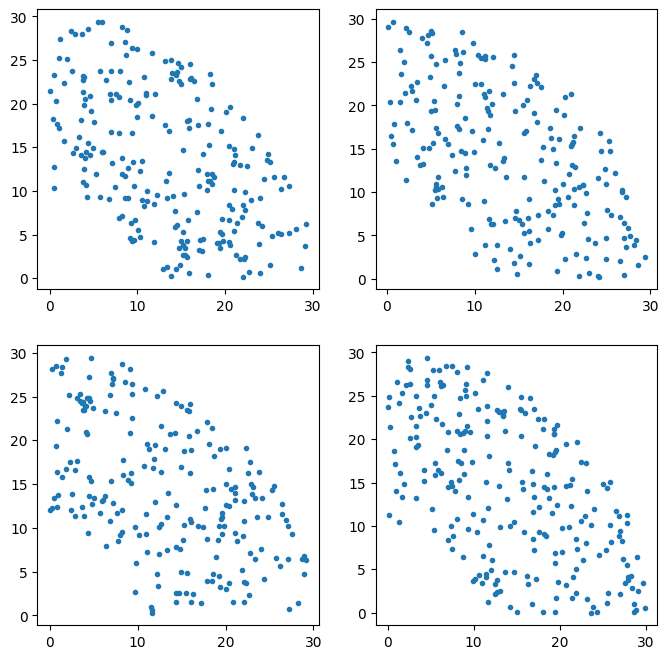

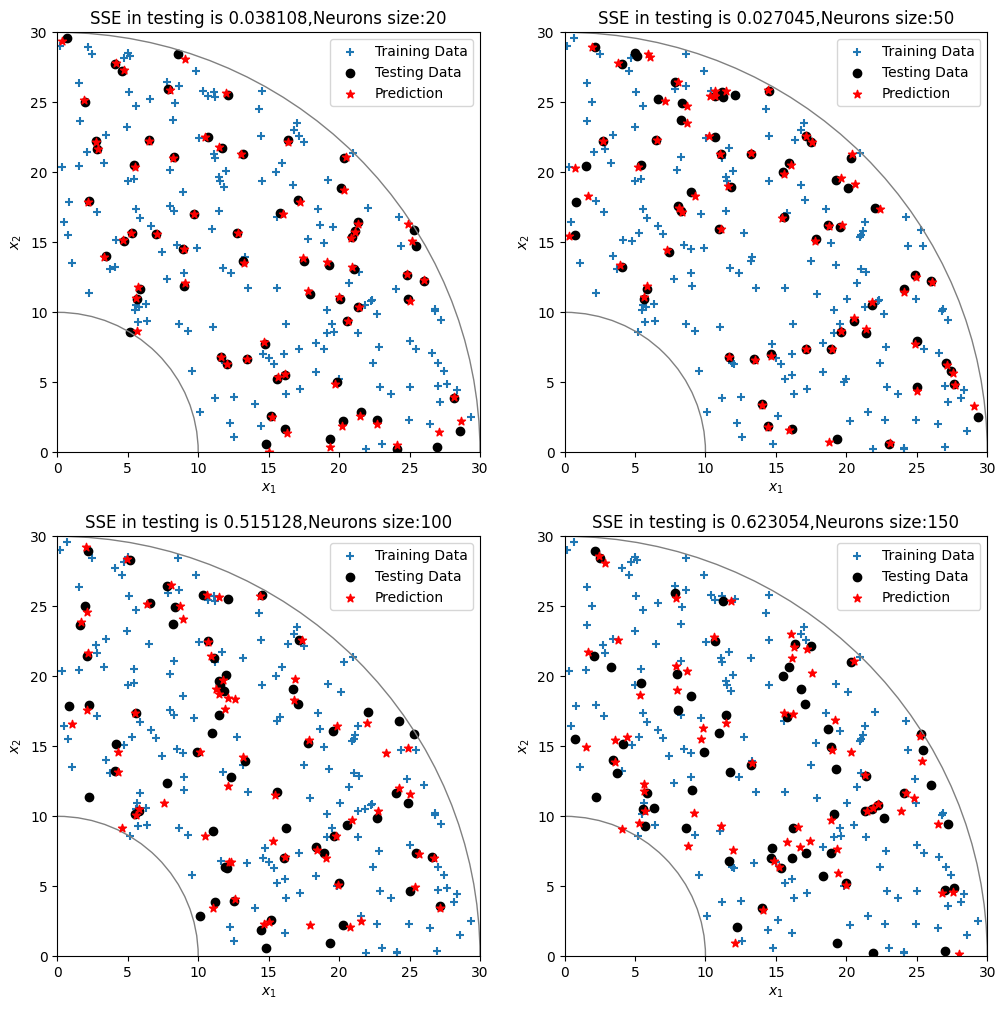

In [7]:
import neurolab as nl
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.special import gammainc
import matplotlib.pyplot as plt
radius_in=10
radius_out=30
samplesize=1000
fig,ax=plt.subplots(2,2,figsize=(8,8))
p1=randsphere(np.array([0,0]),30,samplesize)
p1=p1[(p1[:,0]>0)&(p1[:,1]>0),:]#第一象限
d=np.sum(p1**2,axis=1)
p1=p1[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[0,0].scatter(p1[:,0],p1[:,1],marker='.')
# ------------------------------------------------
p2=randsphere(np.array([0,0]),30,samplesize)
p2=p2[(p2[:,0]>0)&(p2[:,1]>0),:]#第一象限
d=np.sum(p2**2,axis=1)
p2=p2[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[0,1].scatter(p2[:,0],p2[:,1],marker='.')
# ---------------------------------------------------
p3=randsphere(np.array([0,0]),30,samplesize)
p3=p3[(p3[:,0]>0)&(p3[:,1]>0),:]#第一象限
d=np.sum(p3**2,axis=1)
p3=p3[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[1,0].scatter(p3[:,0],p3[:,1],marker='.')
# -------------------------------------------------------
p4=randsphere(np.array([0,0]),30,samplesize)
p4=p4[(p4[:,0]>0)&(p4[:,1]>0),:]#第一象限
d=np.sum(p4**2,axis=1)
p4=p4[d>=radius_in**2,:]
# plt.figure(figsize=(6,6))
ax[1,1].scatter(p4[:,0],p4[:,1],marker='.')
#第一個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=13)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,0].set_title('SSE in testing is {:.6f},Neurons size:20'.format(sse_test))
ax[0,0].legend()
ax[0,0].set_xlabel('$x_1$')
ax[0,0].set_ylabel('$x_2$')
ax[0,0].set_xlim(0, 30)
ax[0,0].set_ylim(0, 30)
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=12)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [50, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[0,1].set_title('SSE in testing is {:.6f},Neurons size:50'.format(sse_test))
ax[0,1].legend()
ax[0,1].set_xlabel('$x_1$')
ax[0,1].set_ylabel('$x_2$')
ax[0,1].set_xlim(0, 30)
ax[0,1].set_ylim(0, 30)
#第三個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=11)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [100, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,0].set_title('SSE in testing is {:.6f},Neurons size:100'.format(sse_test))
ax[1,0].legend()
ax[1,0].set_xlabel('$x_1$')
ax[1,0].set_ylabel('$x_2$')
ax[1,0].set_xlim(0, 30)
ax[1,0].set_ylim(0, 30)
#第四個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=10)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [150, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
ax[1,1].set_title('SSE in testing is {:.6f},Neurons size:150'.format(sse_test))
ax[1,1].legend()
ax[1,1].set_xlabel('$x_1$')
ax[1,1].set_ylabel('$x_2$')
ax[1,1].set_xlim(0, 30)
ax[1,1].set_ylim(0, 30)
plt.savefig('statcomp_hw6_plot6.png')

Trainer(TrainBFGS)
Epoch: 100; Error: 0.07333109929764195;
Epoch: 200; Error: 0.032290903223066034;
Epoch: 300; Error: 0.021982166745987394;
Epoch: 400; Error: 0.017493166338597398;
Epoch: 500; Error: 0.011965178375753359;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.029366377442376572;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.06720515473619867;
Epoch: 200; Error: 0.014721805756864279;
The goal of learning is reached
Trainer(TrainBFGS)
Epoch: 100; Error: 0.036114885677316244;
The goal of learning is reached


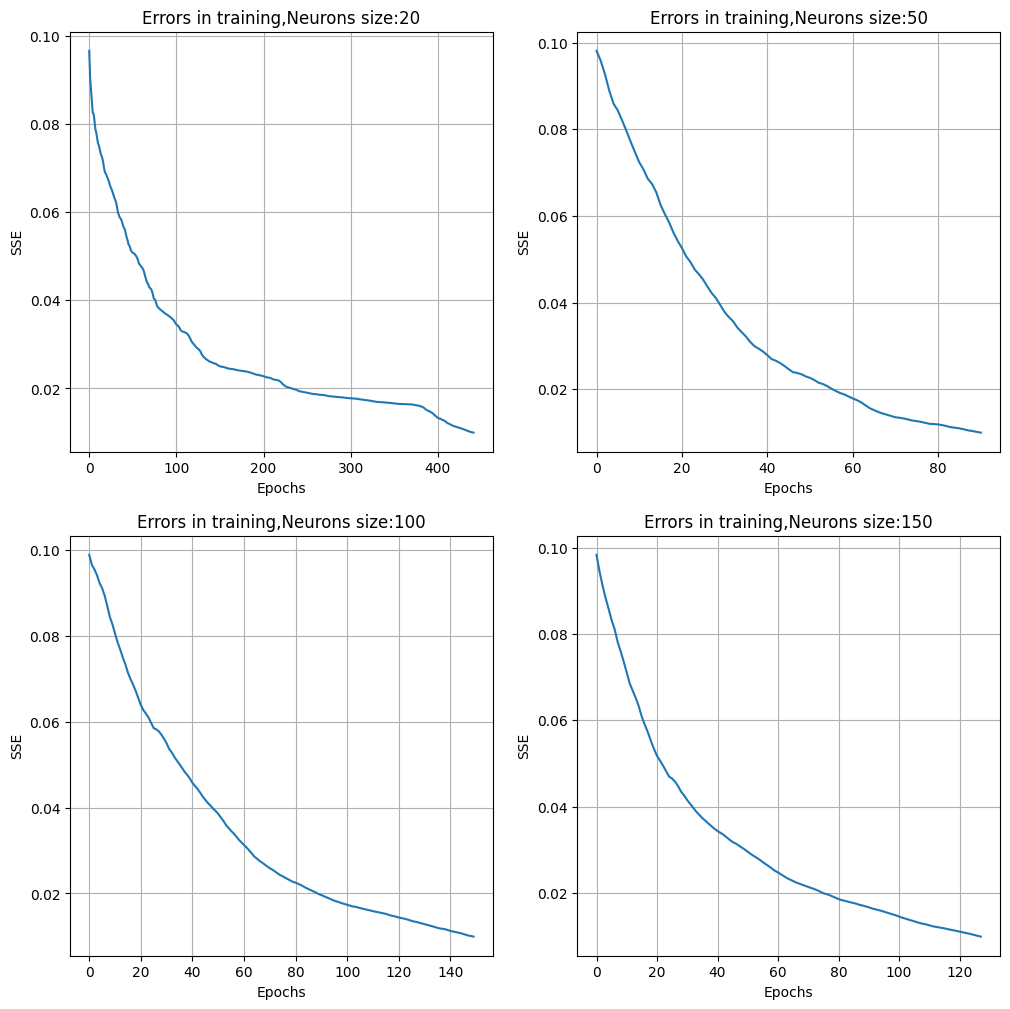

In [8]:
import neurolab as nl
from sklearn.model_selection import train_test_split
#第一個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=13)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
fig,ax=plt.subplots(2,2,figsize=(12,12))
# fig = plt.figure(figsize=(6,6))
# ax = fig.gca()
# ax[0,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [20, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,0].set_title('SSE in testing is {:.6f},Neural size:20'.format(sse_test))
# ax[0,0].legend()
# ax[0,0].set_xlabel('$x_1$')
# ax[0,0].set_ylabel('$x_2$')
# ax[0,0].set_xlim(0, 30)
# ax[0,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,0].plot(err[err < 0.1])
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('SSE')
ax[0,0].grid(True)
ax[0,0].set_title('Errors in training,Neurons size:20')
#第二個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=12)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[0,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[0,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[0,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[0,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [50, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[0,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[0,1].set_title('SSE in testing is {:.6f},Neural size:50'.format(sse_test))
# ax[0,1].legend()
# ax[0,1].set_xlabel('$x_1$')
# ax[0,1].set_ylabel('$x_2$')
# ax[0,1].set_xlim(0, 30)
# ax[0,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[0,1].plot(err[err < 0.1])
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('SSE')
ax[0,1].grid(True)
ax[0,1].set_title('Errors in training,Neurons size:50')
#第三個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=11)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,0].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,0].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,0].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,0].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [100, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,0].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,0].set_title('SSE in testing is {:.6f},Neural size:100'.format(sse_test))
# ax[1,0].legend()
# ax[1,0].set_xlabel('$x_1$')
# ax[1,0].set_ylabel('$x_2$')
# ax[1,0].set_xlim(0, 30)
# ax[1,0].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,0].plot(err[err < 0.1])
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('SSE')
ax[1,0].grid(True)
ax[1,0].set_title('Errors in training,Neurons size:100')
#第四個圓
x1, x2 = p2[:,0], p2[:,1]
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.3,random_state=10)
theta2 = np.arccos((x_train**2 + y_train**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
InputX = np.c_[x_train, y_train] # inputs: N x 2 
OutputY = np.c_[theta1, theta2] # output: N x 2
# ax[1,1].scatter(x_train, y_train, marker='+',  label = 'Training Data')
# ax[1,1].scatter(x_test, y_test, color = 'k', marker='o', label = 'Testing Data')
# ax[1,1].add_artist(plt.Circle(center, radius_out,fill=False, color='0.5'))
# ax[1,1].add_artist(plt.Circle(center, radius_in,fill=False, color='0.5'))   
InputX = np.c_[x_train, y_train] # inputs: N x 2
OutputY = np.c_[theta1, theta2] # output: N x 2
# create network
hidden_output_layers = [150, 2] # hidden layers + output layer
transf = [nl.trans.TanSig(), nl.trans.PureLin()] # activation functions for each layer and output layer
net = nl.net.newff([[x1.min(), x1.max()], [x2.min(), x2.max()]],size = hidden_output_layers, transf = transf)
net.trainf = nl.train.train_bfgs # the default Using scipy.optimize.fmin_bfgs
print(net.trainf) # show the training function 
err = net.train(InputX, OutputY, epochs = 5000, show = 100, goal = 0.01) 
OutputY_hat = net.sim(InputX) 
InputX_test = np.c_[x_test, y_test]
OutputY_hat_test = net.sim(InputX_test)
theta1_hat, theta2_hat = OutputY_hat_test[:,0], OutputY_hat_test[:,1]
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
# ax[1,1].scatter(x_hat, y_hat, color = 'r', marker='*',  label = 'Prediction')
mse = nl.error.MSE()
sse = nl.error.SSE()
# sse = np.sum((OutputY-OutputY_hat)**2)/2 # for training data
theta2 = np.arccos((x_test**2 + y_test**2 - l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2 * np.sin(theta2)/(l1 + l2 * np.cos(theta2)))
OutputY_test = np.c_[theta1, theta2]
sse_test = np.sum((OutputY_test - OutputY_hat_test)**2)/2 
# ax[1,1].set_title('SSE in testing is {:.6f},Neural size:150'.format(sse_test))
# ax[1,1].legend()
# ax[1,1].set_xlabel('$x_1$')
# ax[1,1].set_ylabel('$x_2$')
# ax[1,1].set_xlim(0, 30)
# ax[1,1].set_ylim(0, 30)
err = np.reshape(err, (-1, 1))
ax[1,1].plot(err[err < 0.1])
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('SSE')
ax[1,1].grid(True)
ax[1,1].set_title('Errors in training,Neurons size:150')
plt.savefig('statcomp_hw6_plot7.png')

### 圖形辨識

In [9]:
from sklearn.datasets import fetch_openml
from scipy.io import loadmat
import numpy as np
X,y=fetch_openml('mnist_784',return_X_y=True)#y:每張圖的數字總共有70000張
def montage(A,m,n):   
    sz=np.sqrt(X.shape[1]).astype('int')
    M=np.zeros((m*sz,n*sz))
    for i in range(m):
        for j in range(n):
            M[i*sz:(i+1)*sz,j*sz:(j+1)*sz]=\
                A[i*n+j,:].reshape(sz,sz)

    return M

c:\Users\yangs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


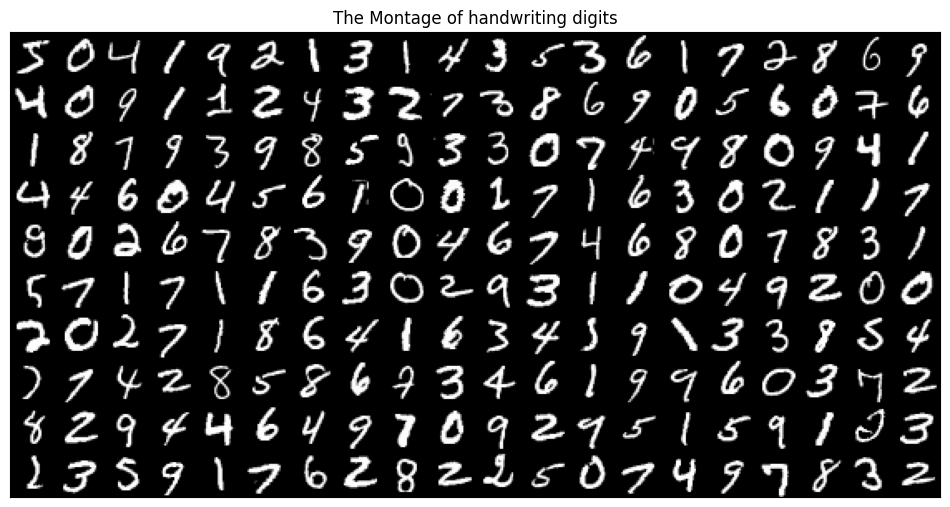

In [10]:
import matplotlib.pyplot as plt
import numpy as np
m,n=10,20
M=montage(np.array(X)[:m*n,:],m,n)#X有七萬列（七萬個數字），但是只想要取前20*30個數字來用
plt.figure(figsize=(12,8))
plt.imshow(M,cmap= 'gray')
# plt.imshow(M,cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.savefig('statcomp_hw6_plot8.png')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

#prepare data
N=1000 #sample size
X_=np.array(X)[:N,:]#因為X是dataframe故要轉換成array
y_=np.array(y)[:N]
#setup and run ANN
hidden_layers=(30,)#one hidden layer
X_train, X_test, y_train, y_test = train_test_split(X_/255, y_, test_size = 0.25)#除以255是為了讓數字標準化
# solver = 'sgd' # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
# solver = 'adam' # default solver
#開始訓練資料
clf1=MLPClassifier(max_iter=5000,solver='sgd',hidden_layer_sizes=hidden_layers,verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf2=MLPClassifier(max_iter=5000,solver='adam',hidden_layer_sizes=hidden_layers,verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf3=MLPClassifier(max_iter=5000,solver='lbfgs',hidden_layer_sizes=hidden_layers,verbose=False,activation='logistic',tol=1e-6,random_state=0)
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
print("accuracy by score for tested data:{:.2f}%".format(100*clf1.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf2.score(X_test,y_test)))
print("accuracy by score for tested data:{:.2f}%".format(100*clf3.score(X_test,y_test)))

c:\Users\yangs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy by score for tested data:85.20%
accuracy by score for tested data:86.00%
accuracy by score for tested data:86.00%


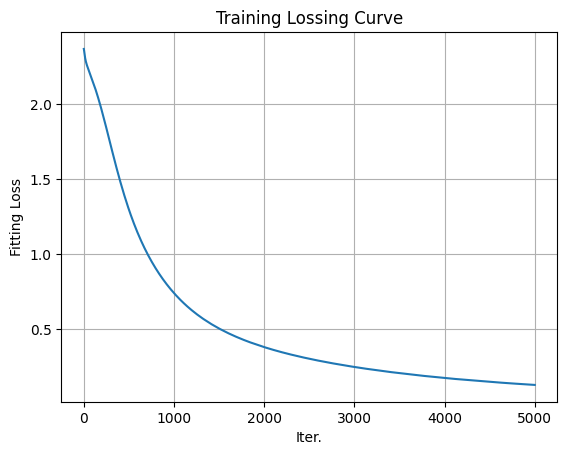

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.plot(clf1.loss_curve_)
plt.grid(True)
plt.title('Training Lossing Curve')
plt.xlabel('Iter.')
plt.ylabel('Fitting Loss')
plt.savefig('statcomp_hw6_plot9.png')

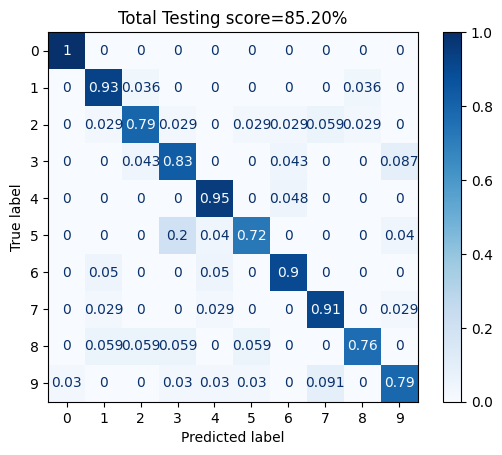

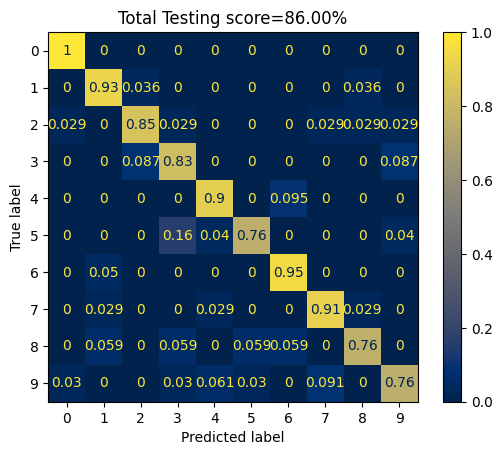

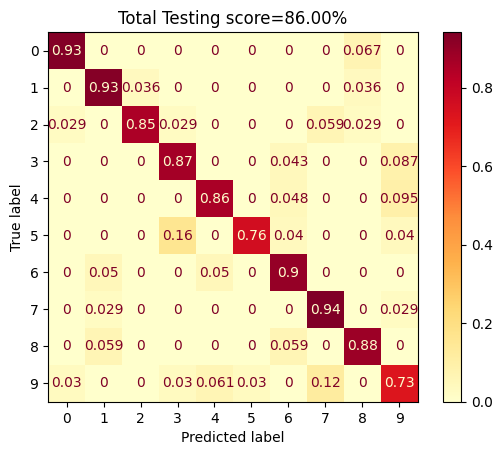

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
#測試資料結果
title1='Total Testing score={:.2f}%'.format(100*clf1.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf1,
X_test,
y_test,
cmap=plt.cm.Blues,
normalize='true',)
disp.ax_.set_title(title1)
plt.savefig('statcomp_hw6_plot10.png')

title2='Total Testing score={:.2f}%'.format(100*clf2.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf2,
X_test,
y_test,
cmap=plt.cm.cividis,
normalize='true',)
disp.ax_.set_title(title2)
plt.savefig('statcomp_hw6_plot11.png')

title3='Total Testing score={:.2f}%'.format(100*clf3.score(X_test,y_test))
disp=ConfusionMatrixDisplay.from_estimator(
clf3,
X_test,
y_test,
cmap=plt.cm.YlOrRd,
normalize='true',)
disp.ax_.set_title(title3)
plt.savefig('statcomp_hw6_plot12.png')